In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd '/content/drive/Shareddrives/BidPrice/DataWarehouse'
!ls

/content/drive/Shareddrives/BidPrice/DataWarehouse
Agg_2_output.csv	     Combined_Basic_X_Range3.csv     Modified_2_output.csv
Agg_3_output.csv	     Combined_Basic_Y_Range2.csv     Modified_3_output.csv
AutogluonModels		     Combined_Basic_Y_Range3.csv     notices_processed.csv
Basic_2_output.csv	     Combined_Modified_X_Range2.csv  saved_model
Basic_3_output.csv	     Combined_Modified_X_Range3.csv  test_Combined_Modified_X_Range2.csv
bids_processed.csv	     Combined_Modified_Y_Range2.csv  test_Combined_Modified_Y_Range2.csv
catboost_info		     Combined_Modified_Y_Range3.csv  train_Combined_Modified_X_Range2.csv
Combined_Basic_X_Range2.csv  intervals			     train_Combined_Modified_Y_Range2.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [33]:
X = pd.read_csv("train_Combined_Modified_X_Range2.csv")
Y = pd.read_csv("train_Combined_Modified_Y_Range2.csv")
test_X = pd.read_csv("test_Combined_Modified_X_Range2.csv")
test_Y = pd.read_csv("test_Combined_Modified_Y_Range2.csv")

# drop index of test_Y
test_Y.reset_index(drop=True, inplace=True)
# 공고번호 제거
if "공고번호" in Y.columns:
    Y.drop("공고번호", axis=1, inplace=True)

if "공고번호" in test_Y.columns:
    test_Y.drop("공고번호", axis=1, inplace=True)

print(test_Y.columns[:10])

# 예시: 필요한 컬럼 4개 선택
train_X = X[["log_기초금액_norm", "투찰률_norm","A값/기초금액_norm", "log_참여업체수_norm"]]
test_X = test_X[["log_기초금액_norm", "투찰률_norm","A값/기초금액_norm", "log_참여업체수_norm"]]

Index(['010_001', '010_002', '010_003', '010_004', '010_005', '010_006',
       '010_007', '010_008', '010_009', '010_010'],
      dtype='object')


In [18]:
test_X.shape, test_Y.shape

((652, 4), (652, 180))

In [13]:
# Autogluon library 다운
#!pip install autogluon -qU
#print("Autogluon has been installed successfully.")

In [21]:
# ✅ 데이터 확인
print("✅ X 데이터셋 크기:", X.shape)
print("✅ Y 데이터셋 크기:", Y.shape)
print("✅ 테스트 X 데이터셋 크기:", test_X.shape)
print("✅ 테스트 Y 데이터셋 크기:", test_Y.shape)

# ✅ 샘플 확인
test_Y.head(2)

✅ X 데이터셋 크기: (2604, 4)
✅ Y 데이터셋 크기: (2604, 180)
✅ 테스트 X 데이터셋 크기: (652, 4)
✅ 테스트 Y 데이터셋 크기: (652, 180)


,010_001,010_002,010_003,010_004,010_005,010_006,010_007,010_008,010_009,010_010,...,100_091,100_092,100_093,100_094,100_095,100_096,100_097,100_098,100_099,100_100
0,0.002688,0.005376,0.043011,0.120968,0.341398,0.275538,0.169355,0.026882,0.005376,0.001344,...,0.001344,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.001292,0.011628,0.029716,0.125323,0.249354,0.307494,0.198966,0.063307,0.003876,0.001292,...,0.000000,0.0,0.001292,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
test_X_ex = test_X[:10]
test_Y_ex = test_Y[:10]
test_X_ex.shape, test_Y_ex.shape

((10, 4), (10, 180))

In [25]:
!pip install autogluon -qU

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.2/266.2 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.1/64.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 430.0/430.0 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.2/352.2 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.7/174.7 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [26]:
# ✅ tqdm 추가 설치 (Colab 환경)
!pip install tqdm --quiet

# ✅ 라이브러리 임포트
import os
import numpy as np
import pandas as pd
from autogluon.tabular import TabularPredictor
from tqdm import tqdm  # Progress Bar 추가
from sklearn.metrics import r2_score, mean_squared_error

# ✅ 저장된 모델 디렉토리 설정
model_base_path = "saved_model"

# ✅ 사용할 n 값 리스트 (예: 10, 20, 50, 100)
n_values = [50]

# ✅ 결과 저장용 딕셔너리
predictions = {}

# ✅ tqdm을 활용한 모델별 예측 수행
for n in n_values:
    tqdm.write(f"\n🔹 Processing n={n}")  # ✅ 구분을 위한 라벨 출력
    predicted_values = []

    # ✅ 해당 n 값에 해당하는 모델 폴더 찾기
    model_folders = [folder for folder in os.listdir(model_base_path) if folder.startswith(f"{n:03}_")]

    print(f"\n✅ Processing n={n}, Found {len(model_folders)} model folders")

    for model_folder in tqdm(model_folders, desc=f"Predicting for n={n}", leave=True):
        model_path = os.path.join(model_base_path, model_folder)

        # ✅ AutoGluon 모델 로드
        predictor = TabularPredictor.load(model_path)

        # ✅ 예측 수행 (테스트 데이터 샘플 10개 사용)
        y_pred = predictor.predict(test_X[:10]).values  # `.values`를 사용하여 NumPy 배열로 변환

        # ✅ 예측값 shape 출력 (Debugging)
        print(f"📌 Model: {model_folder}, y_pred.shape: {y_pred.shape} (Expected: (10,))")

        predicted_values.append(y_pred)

    # ✅ 예측값 저장 (모델별 평균 예측) - 행(row) 기준으로 스택
    predictions[f"n_{n}"] = np.vstack(predicted_values).T  # ✅ 열(column) → 행(row) 기준 변환

    # ✅ 최종 예측값 shape 출력 (Debugging)
    print(f"✅ Final Stacked Predictions for n={n}: {predictions[f'n_{n}'].shape} (Expected: (10, {len(model_folders)}))")

# ✅ 예측값 확인
print("\n✅ 예측값 샘플 확인:", predictions[f"n_{n}"][:5])


🔹 Processing n=50

✅ Processing n=50, Found 50 model folders


Predicting for n=50:   0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
Predicting for n=50:   2%|▏         | 1/50 [00:11<09:38, 11.81s/it]

📌 Model: 050_001, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:   4%|▍         | 2/50 [00:15<05:46,  7.22s/it]

📌 Model: 050_002, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:   6%|▌         | 3/50 [00:20<04:41,  5.99s/it]

📌 Model: 050_003, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:   8%|▊         | 4/50 [00:23<03:36,  4.70s/it]

📌 Model: 050_004, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:  10%|█         | 5/50 [00:25<03:00,  4.01s/it]

📌 Model: 050_005, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:  12%|█▏        | 6/50 [00:28<02:40,  3.64s/it]

📌 Model: 050_006, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:  14%|█▍        | 7/50 [00:31<02:26,  3.41s/it]

📌 Model: 050_007, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:  16%|█▌        | 8/50 [00:35<02:28,  3.55s/it]

📌 Model: 050_008, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:  18%|█▊        | 9/50 [00:38<02:22,  3.47s/it]

📌 Model: 050_009, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:  20%|██        | 10/50 [00:41<02:09,  3.24s/it]

📌 Model: 050_010, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:  22%|██▏       | 11/50 [00:44<02:07,  3.27s/it]

📌 Model: 050_011, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:  24%|██▍       | 12/50 [00:47<02:01,  3.19s/it]

📌 Model: 050_012, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:  26%|██▌       | 13/50 [00:52<02:10,  3.53s/it]

📌 Model: 050_013, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:  28%|██▊       | 14/50 [00:55<01:59,  3.31s/it]

📌 Model: 050_014, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:  30%|███       | 15/50 [00:57<01:51,  3.19s/it]

📌 Model: 050_015, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:  32%|███▏      | 16/50 [01:01<01:51,  3.29s/it]

📌 Model: 050_016, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:  34%|███▍      | 17/50 [01:04<01:46,  3.21s/it]

📌 Model: 050_017, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:  36%|███▌      | 18/50 [01:07<01:36,  3.02s/it]

📌 Model: 050_018, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:  38%|███▊      | 19/50 [01:09<01:29,  2.89s/it]

📌 Model: 050_019, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:  40%|████      | 20/50 [01:12<01:24,  2.81s/it]

📌 Model: 050_020, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:  42%|████▏     | 21/50 [01:15<01:28,  3.05s/it]

📌 Model: 050_021, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:  44%|████▍     | 22/50 [01:18<01:24,  3.02s/it]

📌 Model: 050_022, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:  46%|████▌     | 23/50 [01:21<01:17,  2.86s/it]

📌 Model: 050_023, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:  48%|████▊     | 24/50 [01:23<01:11,  2.73s/it]

📌 Model: 050_024, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:  50%|█████     | 25/50 [01:28<01:21,  3.24s/it]

📌 Model: 050_025, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:  52%|█████▏    | 26/50 [01:32<01:25,  3.57s/it]

📌 Model: 050_026, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:  54%|█████▍    | 27/50 [01:35<01:19,  3.48s/it]

📌 Model: 050_027, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:  56%|█████▌    | 28/50 [01:39<01:17,  3.51s/it]

📌 Model: 050_028, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:  58%|█████▊    | 29/50 [01:43<01:20,  3.82s/it]

📌 Model: 050_029, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:  60%|██████    | 30/50 [01:46<01:09,  3.47s/it]

📌 Model: 050_030, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:  62%|██████▏   | 31/50 [01:49<01:00,  3.18s/it]

📌 Model: 050_031, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:  64%|██████▍   | 32/50 [01:51<00:53,  2.97s/it]

📌 Model: 050_032, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:  66%|██████▌   | 33/50 [01:54<00:47,  2.82s/it]

📌 Model: 050_033, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:  68%|██████▊   | 34/50 [01:57<00:49,  3.06s/it]

📌 Model: 050_034, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:  70%|███████   | 35/50 [02:01<00:51,  3.41s/it]

📌 Model: 050_035, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:  72%|███████▏  | 36/50 [02:04<00:44,  3.18s/it]

📌 Model: 050_036, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:  74%|███████▍  | 37/50 [02:09<00:47,  3.65s/it]

📌 Model: 050_037, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:  76%|███████▌  | 38/50 [02:11<00:40,  3.34s/it]

📌 Model: 050_038, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:  78%|███████▊  | 39/50 [02:14<00:34,  3.11s/it]

📌 Model: 050_039, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:  80%|████████  | 40/50 [02:16<00:29,  2.94s/it]

📌 Model: 050_040, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:  82%|████████▏ | 41/50 [02:19<00:25,  2.85s/it]

📌 Model: 050_041, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:  84%|████████▍ | 42/50 [02:23<00:26,  3.30s/it]

📌 Model: 050_042, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:  86%|████████▌ | 43/50 [02:27<00:23,  3.33s/it]

📌 Model: 050_043, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:  88%|████████▊ | 44/50 [02:31<00:21,  3.57s/it]

📌 Model: 050_044, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:  90%|█████████ | 45/50 [02:34<00:16,  3.28s/it]

📌 Model: 050_045, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:  92%|█████████▏| 46/50 [02:36<00:12,  3.05s/it]

📌 Model: 050_046, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:  94%|█████████▍| 47/50 [02:39<00:08,  2.97s/it]

📌 Model: 050_047, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:  96%|█████████▌| 48/50 [02:41<00:05,  2.86s/it]

📌 Model: 050_048, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50:  98%|█████████▊| 49/50 [02:44<00:02,  2.78s/it]

📌 Model: 050_049, y_pred.shape: (10,) (Expected: (10,))


Predicting for n=50: 100%|██████████| 50/50 [02:48<00:00,  3.38s/it]

📌 Model: 050_050, y_pred.shape: (10,) (Expected: (10,))
✅ Final Stacked Predictions for n=50: (10, 50) (Expected: (10, 50))

✅ 예측값 샘플 확인: [[0.01176257 0.01319827 0.01063846 0.01064697 0.01828398 0.01590655
  0.01524783 0.01857322 0.01551109 0.01647162 0.01661124 0.01507119
  0.01721155 0.02177334 0.01584596 0.01938711 0.01997101 0.01862792
  0.02287015 0.01841099 0.01987885 0.01719845 0.01709896 0.01700884
  0.01676549 0.01475343 0.01565964 0.01413855 0.015517   0.02093134
  0.02111903 0.02092522 0.02089385 0.02438935 0.02370408 0.02096576
  0.02219252 0.02379652 0.01894679 0.02109355 0.02261483 0.0149756
  0.01917088 0.0142509  0.01632766 0.01898368 0.01484781 0.01689256
  0.01745544 0.0218144 ]
 [0.01278717 0.01329612 0.0131593  0.0163641  0.02078489 0.01731217
  0.01494035 0.01604446 0.01321387 0.01817278 0.01640116 0.01535382
  0.01728543 0.02052597 0.01587843 0.02077967 0.02015844 0.01862792
  0.0205344  0.02456756 0.02078513 0.01538247 0.01707021 0.0164442
  0.01684749 0.01601536


✅ 예측값 샘플 확인: [0.01176257 0.01319827 0.01063846 0.01064697 0.01828398 0.01590655
 0.01524783 0.01857322 0.01551109 0.01647162 0.01661124 0.01507119
 0.01721155 0.02177334 0.01584596 0.01938711 0.01997101 0.01862792
 0.02287015 0.01841099 0.01987885 0.01719845 0.01709896 0.01700884
 0.01676549 0.01475343 0.01565964 0.01413855 0.015517   0.02093134
 0.02111903 0.02092522 0.02089385 0.02438935 0.02370408 0.02096576
 0.02219252 0.02379652 0.01894679 0.02109355 0.02261483 0.0149756
 0.01917088 0.0142509  0.01632766 0.01898368 0.01484781 0.01689256
 0.01745544 0.0218144 ]


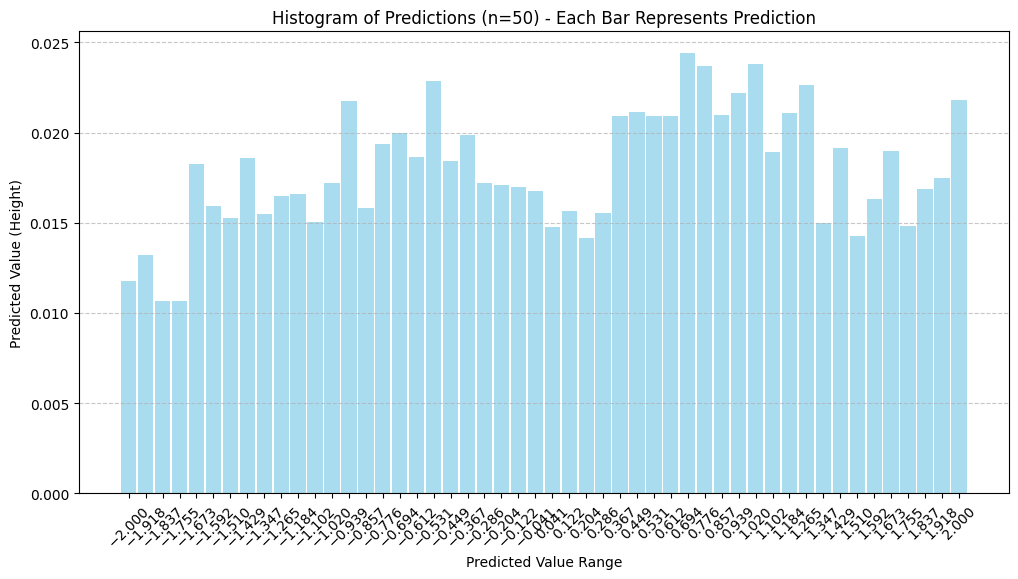

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# ✅ 예측값 확인
print("\n✅ 예측값 샘플 확인:", predictions["n_50"][0])

# ✅ n=10에 대한 예측값을 준비
n = 50
y_pred = predictions[f"n_{n}"][0]

# ✅ -2 ~ 2 범위를 n 개 구간으로 균등하게 나누기
x_positions = np.linspace(-2, 2, n)  # ✅ x축 위치 설정

# ✅ 히스토그램 그리기 (각 구간에 예측값 매핑)
plt.figure(figsize=(12, 6))
plt.bar(x_positions, y_pred, width=(x_positions[1] - x_positions[0]) * 0.9, alpha=0.7, color="skyblue")

# ✅ 그래프 세부 설정
plt.title(f"Histogram of Predictions (n={n}) - Each Bar Represents Prediction")
plt.xlabel("Predicted Value Range")
plt.ylabel("Predicted Value (Height)")
plt.xticks(x_positions, rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [28]:
predictions["n_20"]

KeyError: 'n_20'


✅ 예측값 샘플 확인 (n=50): [0.01176257 0.01324247 0.01023609 0.01064697 0.0181712  0.01492721
 0.01524783 0.01854438 0.01545389 0.01647162 0.01645907 0.0168147
 0.01718352 0.02172981 0.0157682  0.0195501  0.01974685 0.01862792
 0.02287015 0.01841099 0.01987146 0.01782625 0.01709896 0.01700884
 0.0170319  0.0145654  0.01567777 0.01220986 0.01505993 0.02093134
 0.02111903 0.02092522 0.02089385 0.02427248 0.0243107  0.02096576
 0.02195901 0.02379652 0.01894679 0.02109355 0.02261483 0.01422013
 0.01912338 0.01601952 0.01632766 0.01898368 0.01489945 0.01689256
 0.01745544 0.02203283]
[0.         0.         0.         0.         0.         0.00164204
 0.         0.         0.00328407 0.00164204 0.00328407 0.00328407
 0.00164204 0.00656814 0.00492611 0.01477833 0.01477833 0.03448276
 0.02627258 0.06732348 0.05582923 0.05747126 0.06239737 0.10344828
 0.05582923 0.04597701 0.06732348 0.05090312 0.0591133  0.04433498
 0.04269294 0.05747126 0.02791461 0.02791461 0.01477833 0.00656814
 0.00985222 0.0065

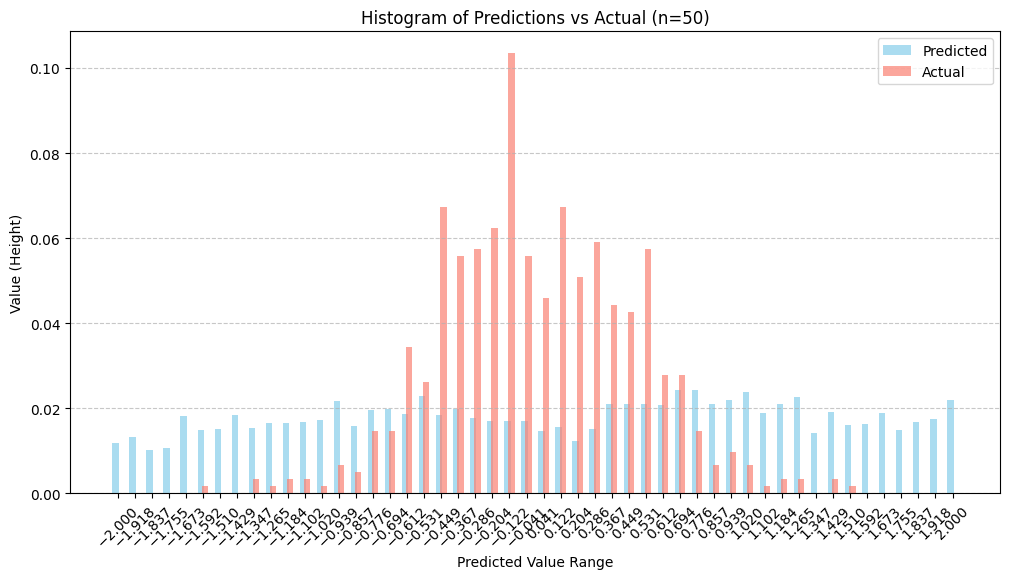

In [32]:
import matplotlib.pyplot as plt
import numpy as np

nth = 7
n=50
# ✅ 예측값 확인
print("\n✅ 예측값 샘플 확인 (n=50):", predictions[f"n_{n}"][2])

# ✅ 실제값 확인 (test_Y에서 010_...에 해당하는 첫 번째 row 가져오기)
actual_values = test_Y.iloc[nth+2, 30:80].values  # test_Y의 첫 번째 샘플 (10개의 실제값)
print(actual_values)
# ✅ n=n에 대한 예측값을 준비
y_pred = predictions[f"n_{n}"][2]  # 첫 번째 샘플의 예측값

# ✅ -2 ~ 2 범위를 n 개 구간으로 균등하게 나누기
x_positions = np.linspace(-2, 2, n)  # ✅ x축 위치 설정

# ✅ 히스토그램 그리기 (각 구간에 예측값과 실제값 매핑)
plt.figure(figsize=(12, 6))
plt.bar(x_positions - 0.01, y_pred, width=0.03, alpha=0.7, color="skyblue", label="Predicted")  # 예측값
plt.bar(x_positions + 0.01, actual_values, width=0.03, alpha=0.7, color="salmon", label="Actual")  # 실제값

# ✅ 그래프 세부 설정
plt.title(f"Histogram of Predictions vs Actual (n={n})")
plt.xlabel("Predicted Value Range")
plt.ylabel("Value (Height)")
plt.xticks(x_positions, rotation=45)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



✅ 예측값 샘플 확인 (n=10): [0.14315175 0.00018403 0.00016834 0.00108072 0.00377724 0.01066736
 0.02567109 0.06787094 0.09622033 0.14341992 0.14210838 0.14165567
 0.11033627 0.05935809 0.02877526 0.0120075  0.0038769  0.00165625
 0.00105593 0.00074018]
[0.         0.         0.00106914 0.00356379 0.01069138 0.02494654
 0.06664291 0.09372773 0.14433357 0.14148254 0.14575909 0.13934426
 0.1147541  0.06022808 0.02886671 0.01247327 0.00356379 0.00142552
 0.00106914 0.00106914]


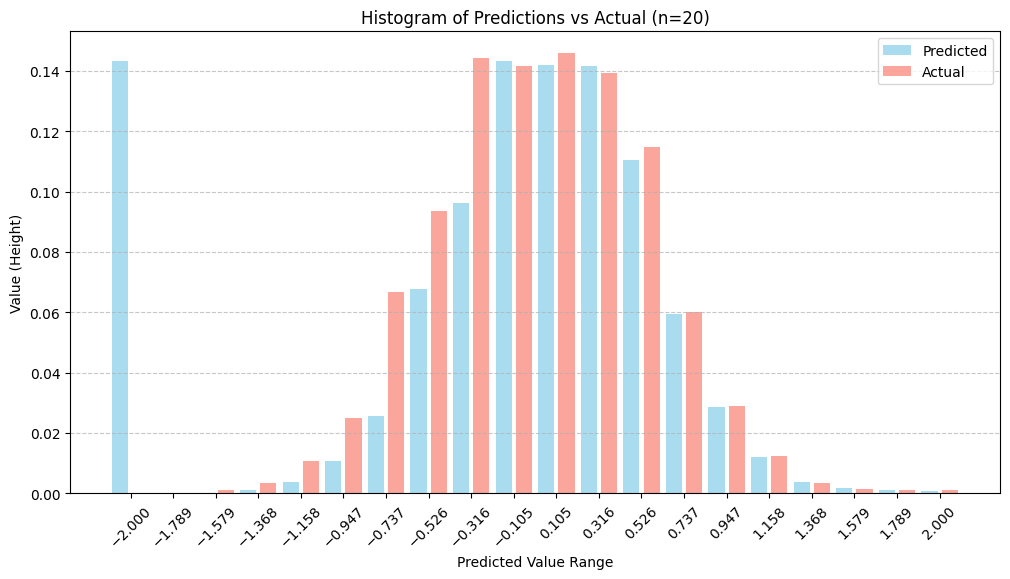

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

nth = 6
# ✅ 예측값 확인
print("\n✅ 예측값 샘플 확인 (n=10):", predictions["n_20"][nth])

# ✅ 실제값 확인 (test_Y에서 010_...에 해당하는 첫 번째 row 가져오기)
actual_values = test_Y.iloc[nth, 10:30].values  # test_Y의 첫 번째 샘플 (10개의 실제값)
print(actual_values)
# ✅ n=10에 대한 예측값을 준비
n = 20
y_pred = predictions[f"n_{n}"][nth]  # 첫 번째 샘플의 예측값

# ✅ -2 ~ 2 범위를 n 개 구간으로 균등하게 나누기
x_positions = np.linspace(-2, 2, n)  # ✅ x축 위치 설정

# ✅ 히스토그램 그리기 (각 구간에 예측값과 실제값 매핑)
plt.figure(figsize=(12, 6))
plt.bar(x_positions - 0.05, y_pred, width=0.08, alpha=0.7, color="skyblue", label="Predicted")  # 예측값
plt.bar(x_positions + 0.05, actual_values, width=0.08, alpha=0.7, color="salmon", label="Actual")  # 실제값

# ✅ 그래프 세부 설정
plt.title(f"Histogram of Predictions vs Actual (n={n})")
plt.xlabel("Predicted Value Range")
plt.ylabel("Value (Height)")
plt.xticks(x_positions, rotation=45)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [ ]:
# ✅ 결과 저장 디렉토리 설정
output_dir = "saved_results"
os.makedirs(output_dir, exist_ok=True)

# ✅ 예측값 저장
for n in n_values:
    pd.DataFrame(predictions[f"n_{n}"], columns=[f"Y_pred_{n}"]).to_csv(os.path.join(output_dir, f"predictions_n{n}.csv"), index=False)

# ✅ 히스토그램 저장
plt.figure(figsize=(10, 6))

for n in n_values:
    plt.hist(predictions[f"n_{n}"], bins=n, alpha=0.5, label=f"Predicted (n={n})")

plt.title("Histogram of Predictions")
plt.xlabel("Predicted Values")
plt.ylabel("Frequency")
plt.legend()
plt.savefig(os.path.join(output_dir, "histogram_predictions.png"))
plt.close()
